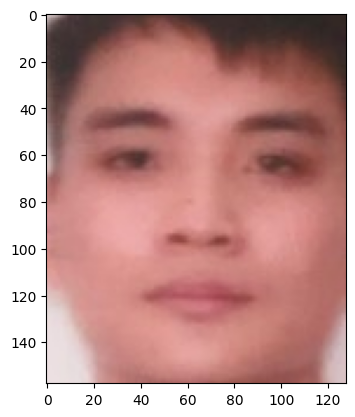

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from facenet.models.mtcnn import MTCNN
from utils.functions import extract_face

image = cv.imread("images/cmnd.jpg")

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

mtcnn = MTCNN()

face, box, _ = extract_face(rgb_image, mtcnn)

plt.imshow(face)


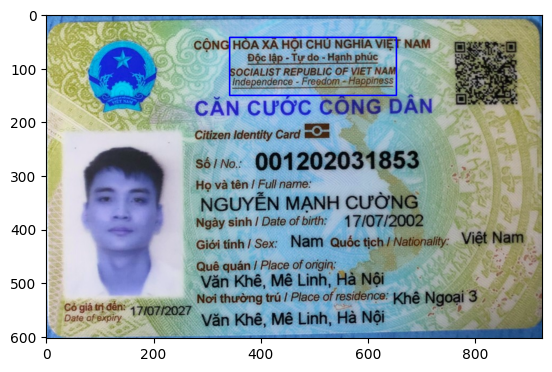

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/cmnd.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')

thresh = cv2.bitwise_not(thresh)

element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(7, 7))

dilate = cv2.dilate(thresh,element,6)
plt.imshow(dilate, 'gray')
erode = cv2.erode(dilate,element,6)
plt.imshow(erode, 'gray')

morph_img = thresh.copy()
cv2.morphologyEx(src=erode, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img)
plt.imshow(morph_img, 'gray')
contours,_ = cv2.findContours(morph_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in contours]

sorted_areas = np.sort(areas)
cnt=contours[areas.index(sorted_areas[-3])] #the third biggest contour is the face
r = cv2.boundingRect(cnt)
cv2.rectangle(image,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(0,0,255),2)
plt.imshow(image)


In [3]:
import random
random.randint(1,5)

1

In [4]:
from face_verification import *
from verification_models import VGGFace2, VGGFace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

detector_model = MTCNN(device = device)

image = cv.imread("images/template.jpg")

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

boxes, _, = detector_model.detect(rgb_image)

boxes

In [5]:
def Cosine_Distance(x, y):
    x = x.view(-1)
    y = y.view(-1)
    dot_product = torch.dot(x, y)
    
    norm_x = torch.norm(x.float())
    norm_y = torch.norm(y.float())
    
    dis = dot_product/(norm_x * norm_y)
    
    return dis

x = torch.rand(2,3)
y = torch.rand(2,3)
Cosine_Distance(x, y)


tensor(0.4741)

In [6]:
from face_verification import *
from verification_models import VGGFace2, VGGFace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

detector_model = MTCNN(device = device)
# face2 = VGGFace2.load_model(device = device)
face1 = VGGFace.load_model(device = device)

In [7]:
filename1 = "images/trang2.jpg"
filename2 = "images/trang.jpg"
filename3 = "images/trang3.jpg"


image1 = get_image(filename1)
image2 = get_image(filename2)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)

0.12902300259042424
0.015727821682303085
0.12387654372477212


In [8]:
filename1 = "images/thanh2.png"
filename2 = "images/thanh4.jpg"
filename3 = "images/thanh.jpg"

image1 = get_image(filename1)
image2 = get_image(filename2)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)



0.4680858998206021
1.3939603656722395
1.4177509408681686


In [9]:
filename1 = "images/ngoc.jpg"
filename2 = "images/ngoc2.jpg"
filename3 = "images/ngoc5.jpg"

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)

0.7096816332102145
1.3387222991293857
1.2140064186722217


In [10]:
filename1 = "images/thanh.jpg"
filename2 = "images/ngoc.jpg"
filename3 = 'images/trang.jpg'

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)


1.534907275009876
1.5692471435991042
1.5006831285678495


In [11]:
filename1 = "images/putin1.jpg"
filename2 = "images/putin2.jpg"
filename3 = 'images/putin3.jpg'

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)


1.0181227703311384
0.3617857548766957
1.1546667006122062


In [12]:
filename1 = "images/trump1.jpg"
filename2 = "images/trump2.jpg"
filename3 = 'images/putin3.jpg'

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)
    

0.9776043044041466
1.4670376671060101
1.5007155436923232


In [13]:
filename1 = "images/thanh4.jpg"
filename2 = "images/ngoc.jpg"
filename3 = 'images/putin3.jpg'

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)
    

1.5299009404763633
1.568291666454993
1.56957899289431


In [14]:
filename1 = "images/cmnd.jpg"
filename2 = "images/cuong2.jpg"
filename3 = 'images/cuong.jpg'

image2 = get_image(filename2)
image1 = get_image(filename1)
image3 = get_image(filename3)

results = verify(image1, image2, detector_model, face1)
results = verify(image1, image3, detector_model, face1)
results = verify(image3, image2, detector_model, face1)
    

0.8530106700261211
1.0140813040565946
1.0532287285992386
